In [1]:
import gensim

In [2]:
import gensim.downloader
glove_vectors = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [3]:
import random
for i in range(5):
  random_word = random.choice(glove_vectors.index_to_key)
  print(random_word)

H.###_Encoder
Tulelake
Faces_Murder
trucking_warehousing
PIERCE_TWP


In [4]:
len(glove_vectors.index_to_key) # 3 million words in vocabulory

3000000

In [ ]:
glove_vectors.index_to_key

In [5]:
def check_vocab(check_words):
  print("%40s %s"%("Word","Present"))
  print("%40s %s"%("------","------"))

  for word in check_words:
    print("%40s  %s"%(word, word in glove_vectors.index_to_key))

    if not word.lower() == word:
      print("%40s  %s"%(word.lower(), word.lower() in glove_vectors.index_to_key))

In [6]:
check_vocab(["Narendra Modi",'biden','Data',"machine"])

                                    Word Present
                                  ------ ------
                           Narendra Modi  False
                           narendra modi  False
                                   biden  True
                                    Data  True
                                    data  True
                                 machine  True


In [7]:
check_vocab(["Narendra_Modi",'Donald_Trump','Joe_Biden','Data',"machine"])

                                    Word Present
                                  ------ ------
                           Narendra_Modi  True
                           narendra_modi  False
                            Donald_Trump  True
                            donald_trump  True
                               Joe_Biden  True
                               joe_biden  True
                                    Data  True
                                    data  True
                                 machine  True


In [8]:
vector = glove_vectors.get_vector("Narendra_Modi")
vector.shape

(300,)

In [20]:
vector = glove_vectors.get_vector("Narendra Modi")
vector.shape

KeyError: "Key 'Narendra Modi' not present"

In [ ]:
vector

In [10]:
vector = glove_vectors.get_vector("data")
vector.shape

(300,)

In [11]:
vector = glove_vectors.get_vector("joe_biden")
vector.shape

(300,)

In [12]:
index_value = glove_vectors.key_to_index["Narendra_Modi"]
index_value # index position

68255

In [13]:
glove_vectors.vectors.shape

(3000000, 300)

In [ ]:
glove_vectors.vectors # Weight Matrix

In [14]:
word1 = 'bread'
word2 = 'jam'
score = glove_vectors.similarity(word1,word2)
print(f"Cosine similarity between {word1} & {word2} is {score}")

Cosine similarity between bread & jam is 0.22019492089748383


In [15]:
word1 = 'king'
word2 = 'queen'
score = glove_vectors.similarity(word1,word2)
print(f"Cosine similarity between {word1} & {word2} is {score}")

Cosine similarity between king & queen is 0.6510956287384033


In [16]:
word1 = 'soviet'
word2 = 'union'
score = glove_vectors.similarity(word1,word2)
print(f"Cosine similarity between {word1} & {word2} is {score}")

Cosine similarity between soviet & union is 0.15801382064819336


In [17]:
word1 = 'good'
word2 = 'like'
score = glove_vectors.similarity(word1,word2)
print(f"Cosine similarity between {word1} & {word2} is {score}")

Cosine similarity between good & like is 0.463897705078125


In [18]:
word1 = 'couch'
word2 = 'sofa'
score = glove_vectors.similarity(word1,word2)
print(f"Cosine similarity between {word1} & {word2} is {score}")

Cosine similarity between couch & sofa is 0.8309178948402405


In [19]:
word1 = 'water'
word2 = 'man'
score = glove_vectors.similarity(word1,word2)
print(f"Cosine similarity between {word1} & {word2} is {score}")

Cosine similarity between water & man is 0.07345569133758545


# Most Similar

In [ ]:
word = 'Water'
glove_vectors.most_similar(positive=word, topn=10)

In [ ]:
word = 'water'
glove_vectors.most_similar(negative=word, topn=10)

In [ ]:
glove_vectors.similarity('water','IF_SEPT')

In [ ]:
glove_vectors.similarity('water','water')

In [ ]:
glove_vectors.most_similar(positive='king', topn=10)

# Training the Model

In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

In [ ]:
!gunzip reviews_Cell_Phones_and_Accessories_5.json.gz

In [ ]:
import gensim
import pandas as pd

df = pd.read_json("/content/reviews_Cell_Phones_and_Accessories_5.json",lines=True)
df.head()

In [ ]:
df['reviewText'][0]

In [ ]:
df['reviewText'][1]

In [ ]:
gensim.utils.simple_preprocess(df['reviewText'][1])

In [ ]:
review_text = df['reviewText'].apply(gensim.utils.simple_preprocess)
review_text.head()

# Train the Word2Vec Model

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(window=5,
                 vector_size=25,
                 min_count=6,
                 sg=1)

In [ ]:
model.build_vocab(review_text)

In [ ]:
df.shape

In [ ]:
model.corpus_count

In [ ]:
model.train(review_text, total_examples=model.corpus_count , epochs=5)

In [ ]:
model.save("final_word2vec.bin")

In [ ]:
model.wv.most_similar("bad")

In [ ]:
model.wv.most_similar("good")

In [ ]:
model.wv.most_similar("cheap")

In [ ]:
model.wv.similarity(w1="cheap",w2='good')

In [ ]:
weight_matrix = model.wv.vectors
weight_matrix.shape

In [ ]:
model.wv.get_vector('cheap')

In [ ]:
model.wv.get_vector('good')

In [ ]:
model.wv.index_to_key

In [ ]:
model.wv.key_to_index['the']

In [ ]:
weight_matrix[0]

In [ ]:
model.wv.get_vector('the')

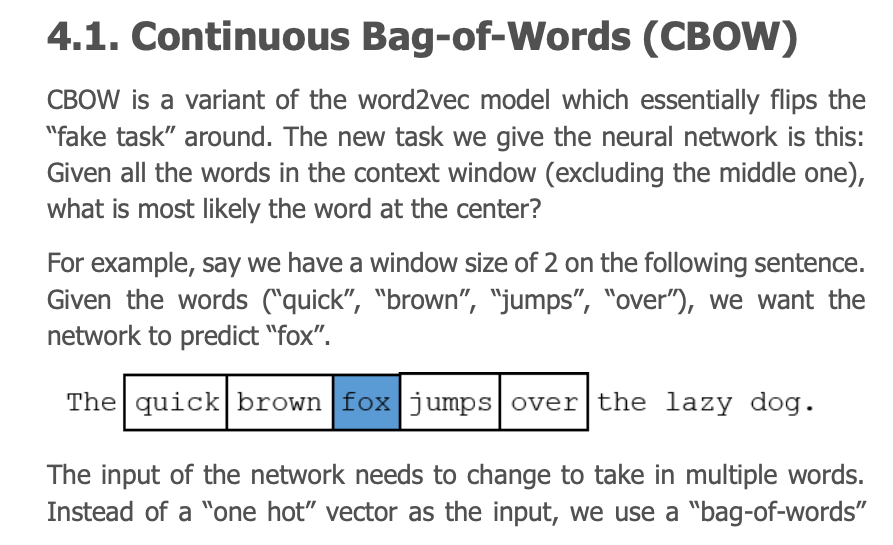

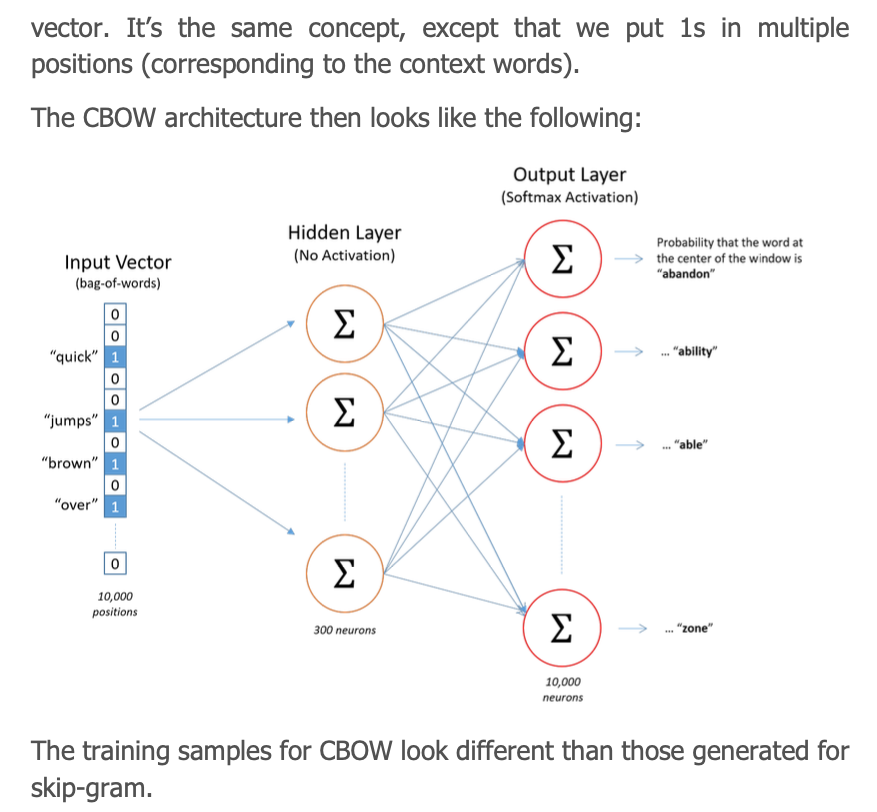

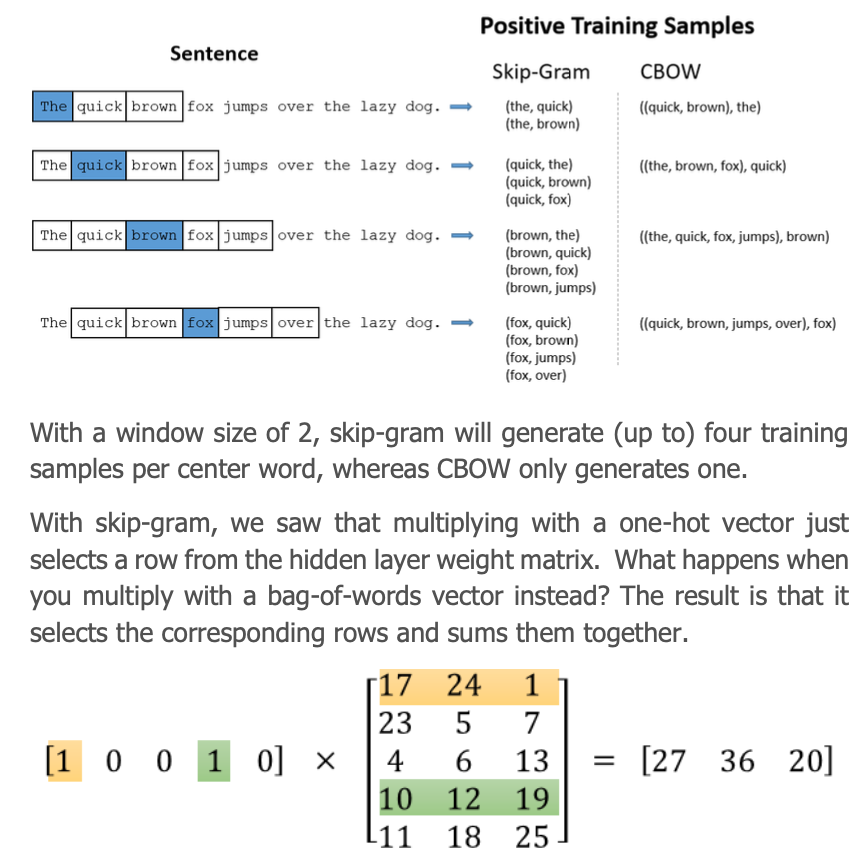

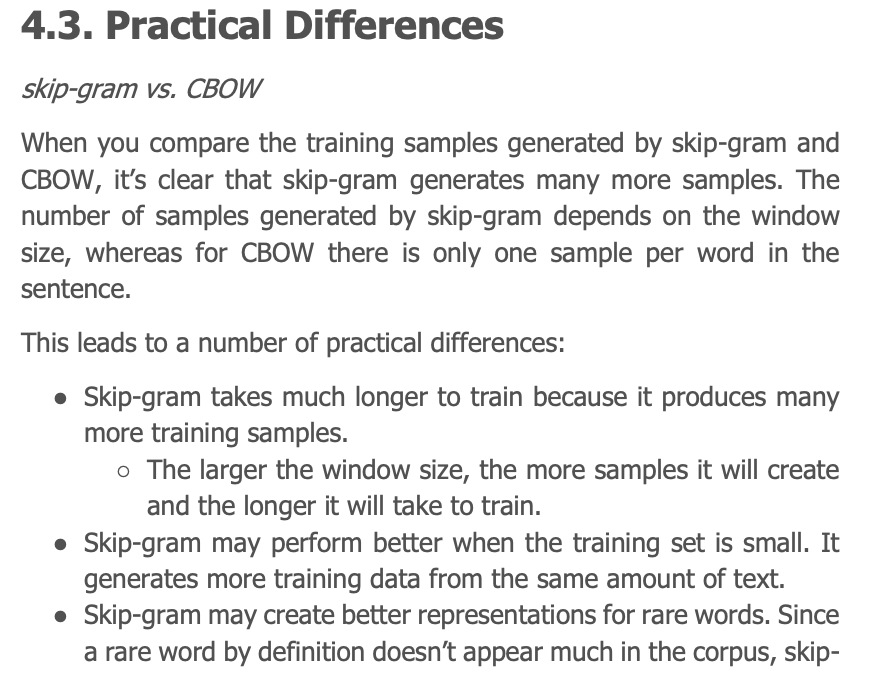

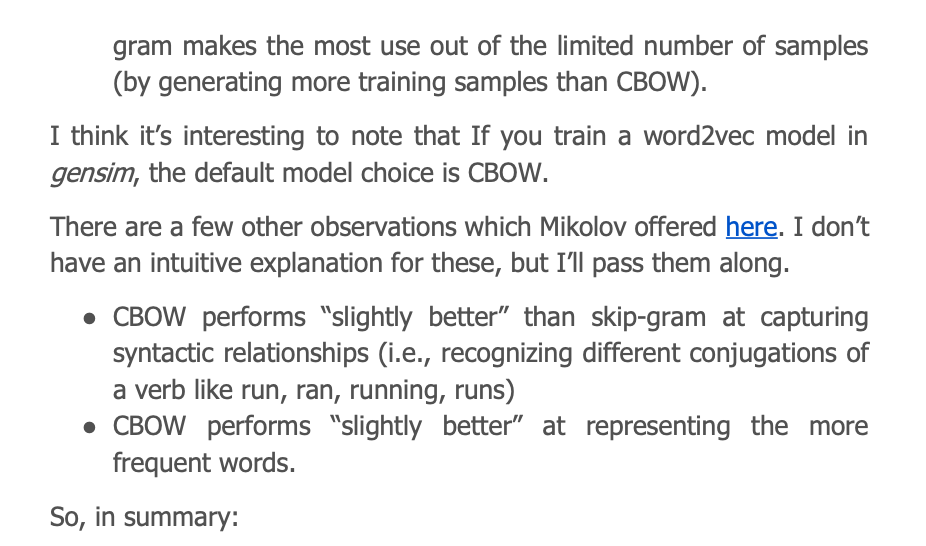

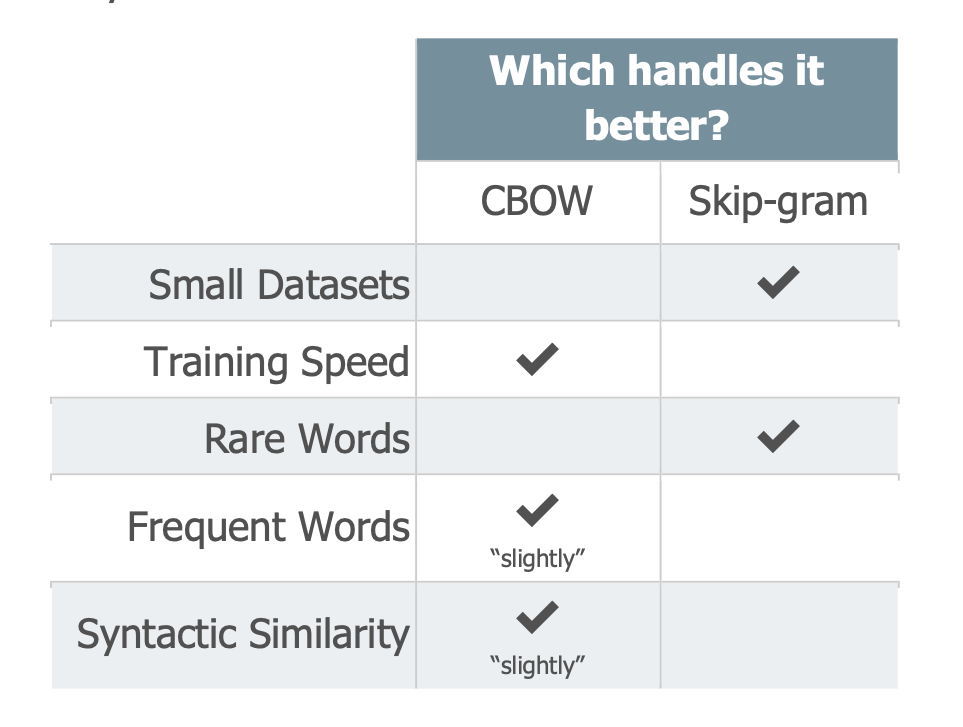

In [ ]:
# Suggest to train the CBOW